In [ ]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting Total Building Costs
-----------------------------------
For range of:
* technical arrangements
* PV sizes
* multiple VB sites
* external tariffs and amortization periods

In [96]:
#
# Need to set this up using combined_value2 as the study
project='EN1_value_of_pv'
study_name='siteC_value4'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\studies'
op = opm.Output(base_path = base_path,
                          project = project,
                          study_name = study_name)

__PLAN__
2. Compare `en` , `en_pv`, for range of `kWp / unit`:
    * Scatter Plot Total $ vs vs kWp / unit,
    * colour per `site`
    * symbol per `a_years` amortization
    * plot per `en_capex`  / `parent` tariff

In [97]:
self = op
df = self.data.copy()
df_in = self.study_parameters.copy()

In [98]:
df_in = df_in[df_in['arrangement'].str.contains('en')]
df = df[df['arrangement'].str.contains('en')]

In [99]:
# Set up constants
sites=['A','E','D','B','H','I','G','C','J','F']
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dict_sites = dict(zip(sites, values))

markers =['x','o','D','*','^','H','s','v','>','<']

site_markers = dict(zip(sites,markers))
# get pv sizes for maximum pv systems
maximums={}
pv_ref_file='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\reference\\capex_pv_lookup.csv'
pv_ref=pd.read_csv(pv_ref_file)
pv_ref = pv_ref.set_index('pv_cap_id')
for i in pv_ref.index:
    if 'max' in i and 'site' in i:
        site = um.find_between(i,'_','_')
        maximums[site] = pv_ref.loc[i,'kW']
en_capexes= ['capex_4','capex_5','capex_6']
parents = ['EA310_12c_FIT8', 'EA310_12c_FIT12', 'EA310_12c',
           'EA310_10c_FIT8', 'EA310_10c_FIT12', 'EA310_10c',
         'EA310_8c_FIT8', 'EA310_8c_FIT12','EA310_8c']

In [100]:
# get kWp / unit and total $ / unit for each scenario
df_in['pv_filename'].fillna('zero',inplace=True)
for s in df_in.index:
    site = df_in.loc[s,'load_folder'][-1]
    df_in.loc[s,'site']=site
    if df_in.loc[s,'pv_filename'] == 'zero':
        df_in.loc[s,'kwp_unit'] =0
    elif 'max' in df_in.loc[s,'pv_filename']:
        df_in.loc[s,'kwp_unit']= maximums[site]/df.loc[s,'number_of_households']
    else:
        df_in.loc[s,'kwp_unit'] = float(df_in.loc[s,'pv_filename'][-9]) + float(df_in.loc[s,'pv_filename'][-7])/10
    df.loc[s,'$_unit'] = df.loc[s,'total$_building_costs_mean']/df.loc[s,'number_of_households']
df_in['colour'] = df_in['a_term'].apply(lambda x: int(x/5))

In [101]:
# Plotting set-up parameters
cmap = mpl.cm.tab10


alpha=1
# capex_markers={'capex_4' : 'o',
#              'capex_5' : 'x',
#              'capex_6' : '+'}

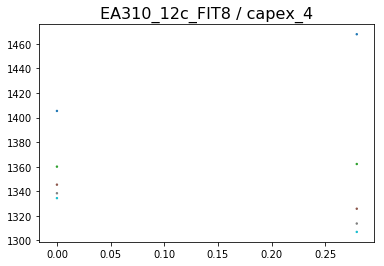

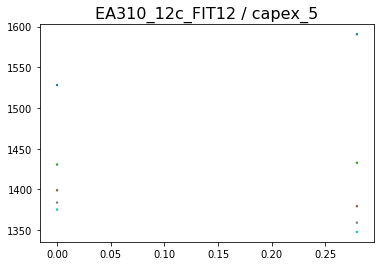

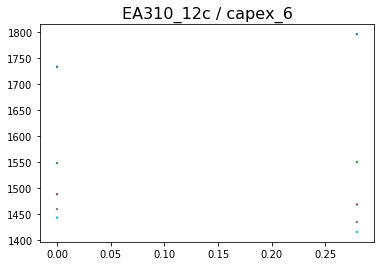

In [102]:
for parent, capex  in zip (parents, en_capexes):   
    title = parent + " / " + capex                        
    p_slice = df_in['parent']==parent 
    c_slice = df_in['en_capex_id'] == capex
    dfx=df_in[p_slice & c_slice]
    dfy=df[p_slice & c_slice]
    fig, ax = plt.subplots()
    x = dfx['kwp_unit']
    y = dfy['$_unit']
    c = dfx['colour']
    scat = ax.scatter(x, y, s=2,  cmap=cmap, alpha=alpha,  c = c)  # edgecolors='k',c=colours,
    ax.set_title(title, fontsize=16, y=1.0)
#fig.show()

In [103]:
# TWO Tasks: 
# Plot 1 colour per amortization period
# Convert to plotting scenarios instead of averages

In [104]:
df_in.head()

,pv_filename,load_folder,arrangement,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site,kwp_unit,colour
scenario,,,,,,,,,,,,,,
11,vb_pv\site_C_max.csv,h_all_site_C,en_pv,site_C_max,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,5.0,0.06,C,0.279412,1
12,vb_pv\site_C_max.csv,h_all_site_C,en_pv,site_C_max,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,10.0,0.06,C,0.279412,2
13,vb_pv\site_C_max.csv,h_all_site_C,en_pv,site_C_max,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,15.0,0.06,C,0.279412,3
14,vb_pv\site_C_max.csv,h_all_site_C,en_pv,site_C_max,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,20.0,0.06,C,0.279412,4
15,vb_pv\site_C_max.csv,h_all_site_C,en_pv,site_C_max,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,25.0,0.06,C,0.279412,5


In [105]:
df.head()

,scenario_label,arrangement,number_of_households,load_folder,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_total$,NUOS_charges$_mean,...,eno$_total_payment_mean,eno_net$_mean,export_kWh_mean,import_kWh_mean,pv_ratio_mean,retailer_receipt$_mean,self-consumption_mean,total$_building_costs_mean,total_building_load_mean,$_unit
scenario,,,,,,,,,,,,,,,,,,,,,
11,siteC_value4_011,en_pv,34.0,h_all_site_C,8500.0,3619.100446,3923.012086,0.0,0.0,15504.052556,...,49904.975103,-49904.975103,0.0,159641.826211,7.53091,33862.86257,100.0,49904.975103,172572.29172,1467.793385
12,siteC_value4_012,en_pv,34.0,h_all_site_C,8500.0,2078.303796,1873.137909,0.0,0.0,15504.052556,...,46314.304275,-46314.304275,0.0,159641.826211,7.53091,33862.86257,100.0,46314.304275,172572.29172,1362.185420
13,siteC_value4_013,en_pv,34.0,h_all_site_C,8500.0,1579.699982,1135.156205,0.0,0.0,15504.052556,...,45077.718757,-45077.718757,0.0,159641.826211,7.53091,33862.86257,100.0,45077.718757,172572.29172,1325.815258
14,siteC_value4_014,en_pv,34.0,h_all_site_C,8500.0,1341.158941,963.743060,0.0,0.0,15504.052556,...,44667.764571,-44667.764571,0.0,159641.826211,7.53091,33862.86257,100.0,44667.764571,172572.29172,1313.757782
15,siteC_value4_015,en_pv,34.0,h_all_site_C,8500.0,1206.132224,866.714245,0.0,0.0,15504.052556,...,44435.709039,-44435.709039,0.0,159641.826211,7.53091,33862.86257,100.0,44435.709039,172572.29172,1306.932619


In [106]:
scen_path = os.path.join(base_path,project,'outputs',study_name,'scenarios')
flist = os.listdir(scen_path)

In [112]:

sdf_all= pd.DataFrame()
for s in df.index:
    f = df.loc[s,'scenario_label']
    fname = f+'.csv'
    fpath = os.path.join(scen_path, fname)
    sdf = pd.read_csv(fpath ,usecols=['total$_building_costs'])
    sdf['kwp_unit'] = df_in.loc[s,'kwp_unit']
    sdf['site'] = df_in['load_folder'].apply(lambda x:x[-1])
    sdf['a_term'] = df_in.loc[s,'a_term']
    sdf['parent'] = df_in.loc[s,'parent']
    sdf['en_capex_id'] = df_in.loc[s,'en_capex_id']
    numh = df.loc[s,'number_of_households']
    sdf['$_unit'] = sdf['total$_building_costs'].apply(lambda x: x/numh)
    sdf['colour'] = df_in.loc[s,'colour']
    sdf['scenario']= s
    sdf_all = sdf_all.append(sdf)
sdf_all =sdf_all.reset_index()

In [113]:
sdf_all

,index,total$_building_costs,kwp_unit,site,a_term,parent,en_capex_id,$_unit,colour,scenario
0,0,47587.142133,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1399.621827,1,11
1,1,50737.111077,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1492.267973,1,11
2,2,50549.734304,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1486.756891,1,11
3,3,50908.061443,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1497.295925,1,11
4,4,47846.093455,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1407.238043,1,11
5,5,55666.919262,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1637.262331,1,11
6,6,47663.299797,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1401.861759,1,11
7,7,52099.110839,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1532.326789,1,11
8,8,48739.227125,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1433.506680,1,11
9,9,52605.878742,0.279412,NaN,5.0,EA310_12c_FIT8,capex_4,1547.231728,1,11


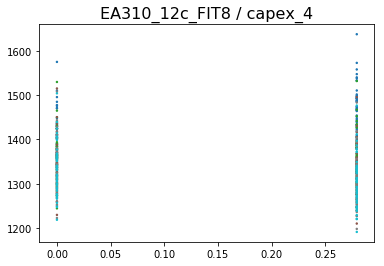

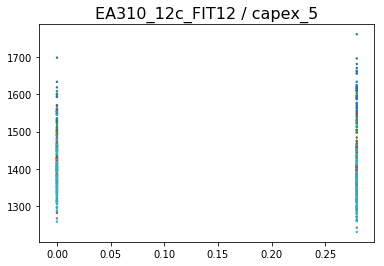

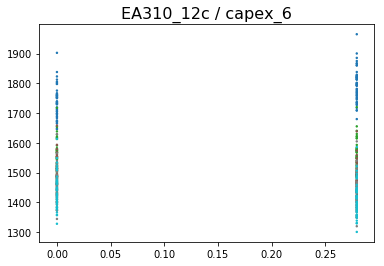

In [114]:
# plot vs kWp
for parent, capex  in zip (parents, en_capexes):   
    title = parent + " / " + capex                        
    p_slice = sdf_all['parent']==parent 
    c_slice = sdf_all['en_capex_id'] == capex
    dfx=sdf_all[p_slice & c_slice]
    dfy=sdf_all[p_slice & c_slice]
    fig, ax = plt.subplots()
    x = dfx['kwp_unit']
    y = dfy['$_unit']
    c = dfx['colour']
    scat = ax.scatter(x, y, s=2,  cmap=cmap, alpha=alpha,  c = c)  # edgecolors='k',c=colours,
    ax.set_title(title, fontsize=16, y=1.0)
    pname = study_name +'_kwp_'+ parent+'_' + capex + '.png'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)

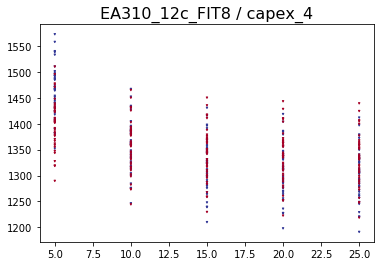

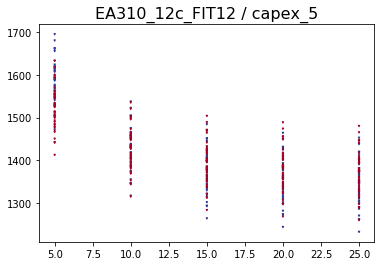

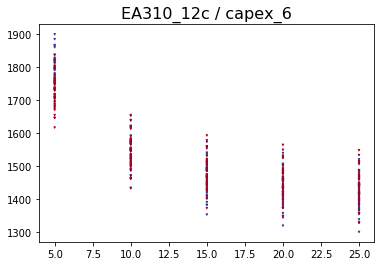

In [117]:
# Plot $ vs a_term

kwmax = sdf_all['kwp_unit'].max()
sdf_all['kw_col']=sdf_all['kwp_unit'].apply(lambda x: x/ kwmax)
cmap = mpl.cm.RdYlBu
terms=[5,10,15,20,25]
markers={5:'x',
         10:'o',
         15:'+',
         20:'^',
         25:'*'}
for parent, capex  in zip (parents, en_capexes):   
    title = parent + " / " + capex 
    p_slice = sdf_all['parent']==parent 
    c_slice = sdf_all['en_capex_id'] == capex
    df=sdf_all[p_slice & c_slice]
    fig, ax = plt.subplots()
    for site in sites:
        df1 = df[df['site']==site]       
        x = df1['a_term']
        y = df1['$_unit']
        c = df1['kw_col']
        scat = ax.scatter(x, y, s=2,  cmap=cmap, alpha=alpha,  c = c, marker =site_markers[site])  
    ax.set_title(title, fontsize=16, y=1.0)
    pname = study_name +'_aterm_'+ parent+'_' + capex + '.png'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)

In [ ]:
dfx['kw_col']